### Project 2 - IE6400 Foundations of Data Analytics - Group 8

Team members:

Jaamie Maarsh Joy Martin joymartin.j@northeastern.edu +1 (206)-356-0024

Wenbo Zhu zhu.wenbo@northeastern.edu +1 (678)-873-3680

Kalyan Kumar Chenchu Malakondaiah chenchumalakondaia.k@northeastern.edu +1 (206)-679-0953

In [100]:
!pip install pmdarima


In [101]:
!pip install prophet

In [228]:
!pip install ts2vg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.2/410.2 kB 12.1 MB/s eta 0:00:00


In [229]:
!pip install igraph


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00a 0:00:01


In [233]:
!pip install pycairo


  Using cached pycairo-1.25.1.tar.gz (347 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-311
      creating build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/__init__.py -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/__init__.pyi -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      copying cairo/py.typed -> build/lib.macosx-11.1-arm64-cpython-311/cairo
      running build_ext
      'pkg-config' not found.
      Command ['pkg-config', '--print-errors', '--exists', 'cairo >= 1.15.10']
      [end of output]
  
  note: This

In [231]:

!pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.4 MB/s eta 0:00:00a 0:00:01


In [232]:
!pip install cairocffi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 7.1 MB/s eta 0:00:00


In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import itertools
import numpy as np
import statsmodels.api as sm
import networkx as nx
import igraph as ig



# Commands for time series & Forcasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from ts2vg import HorizontalVG
from ts2vg import NaturalVG

# Evaluation metrics
from sklearn import metrics


#This command is to ignore all the warnings 
warnings.filterwarnings("ignore")

# Task 1

In [ ]:
#Importing datasets for working

data1 = pd.read_csv('acc_climbingdown_chest.csv')
data2 = pd.read_csv('acc_climbingup_chest.csv')
data3 = pd.read_csv('acc_running_chest.csv')
data4 = pd.read_csv('acc_walking_chest.csv')
data5 = pd.read_csv('acc3_climbingdown_chest.csv')
data6 = pd.read_csv('acc3_climbingup_chest.csv')
data7=pd.read_csv('acc3_running_chest.csv')
data8=pd.read_csv('acc3_walking_chest.csv')
s2_climbingdown = data1.iloc[999:2023]
s2_climbingup=data2.iloc[999:2023]
s2_running=data3.iloc[999:2023]
s2_walking=data4.iloc[999:2023]
s3_climbingdown=data5.iloc[999:2023]
s3_climbingup=data6.iloc[999:2023]
s3_running=data7.iloc[999:2023]
s3_walking=data8.iloc[999:2023]


# Task 2

In [167]:
# Loading of the dataset

US_report_2020 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2020_US_Region_Mobility_Report.csv', low_memory=False)
US_report_2021 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2021_US_Region_Mobility_Report.csv', low_memory=False)
US_report_2022 = pd.read_csv('/Users/jaamiemaarshj/Desktop/  DAE Course Materials/Fundamentals of Data Analytics/Project - 2/2022_US_Region_Mobility_Report.csv', low_memory=False)

In [168]:
display(US_report_2020)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812060,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-24,NaN,NaN,NaN,NaN,-56.0,NaN
812061,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-28,NaN,NaN,NaN,NaN,-40.0,NaN
812062,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-29,NaN,NaN,NaN,NaN,-43.0,NaN
812063,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-30,NaN,NaN,NaN,NaN,-40.0,NaN


In [169]:
# Combining the three DataFrames into one
us_mobility_data = pd.concat([US_report_2020, US_report_2021, US_report_2022], ignore_index=True)

# Assume df is your DataFrame
us_mobility_data_copy = us_mobility_data.copy()


In [170]:
#Catagorizing the table based on 'King County' region
us_mobility_data_copy = us_mobility_data[us_mobility_data['sub_region_2'] == 'King County']
display(us_mobility_data_copy.head())

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
765150,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-1.0,-2.0,11.0,8.0,-3.0,0.0
765151,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,13.0,1.0,19.0,3.0,-2.0,-1.0
765152,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,10.0,4.0,64.0,-13.0,-40.0,7.0
765153,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,4.0,2.0,51.0,6.0,-8.0,1.0
765154,US,United States,Washington,King County,NaN,NaN,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,2.0,62.0,6.0,-7.0,0.0


In [171]:
us_mobility_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 765150 to 2468874
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 974 non-null    object 
 1   country_region                                      974 non-null    object 
 2   sub_region_1                                        974 non-null    object 
 3   sub_region_2                                        974 non-null    object 
 4   metro_area                                          0 non-null      float64
 5   iso_3166_2_code                                     0 non-null      object 
 6   census_fips_code                                    974 non-null    float64
 7   place_id                                            974 non-null    object 
 8   date                                                974 non-null    obj

In [172]:
# Assume df is your DataFrame
null_values = us_mobility_data_copy.isnull().sum()

# Display the result
print(null_values)

country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                            0
metro_area                                            974
iso_3166_2_code                                       974
census_fips_code                                        0
place_id                                                0
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64


In [173]:
# Dropping the mentioned columns due to the presence of null values
columns_to_drop = ['iso_3166_2_code', 'metro_area']
us_mobility_data_copy = us_mobility_data_copy.drop(columns=columns_to_drop)


In [174]:
Unnecessary_columns = ['retail_and_recreation_percent_change_from_baseline', 'parks_percent_change_from_baseline' , 'transit_stations_percent_change_from_baseline']
us_mobility_data_copy = us_mobility_data_copy.drop(columns=Unnecessary_columns)


In [175]:
display(us_mobility_data_copy)

,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,date,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
765150,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-15,-2.0,-3.0,0.0
765151,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-16,1.0,-2.0,-1.0
765152,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-17,4.0,-40.0,7.0
765153,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-18,2.0,-8.0,1.0
765154,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2020-02-19,2.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2468870,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-11,-10.0,-40.0,9.0
2468871,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-12,-10.0,-41.0,9.0
2468872,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-13,-10.0,-41.0,9.0
2468873,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,2022-10-14,-9.0,-44.0,9.0


In [176]:
# Convert the 'date' column to datetime format
#us_mobility_data['date'] = pd.to_datetime(us_mobility_data['date'])

# Remove months before April 2020
us_mobility_data_copy['date'] = pd.to_datetime(us_mobility_data_copy['date'])
us_mobility_data_copy = us_mobility_data_copy[us_mobility_data_copy['date'] >= '2020-04-01']
us_mobility_data_copy = us_mobility_data_copy.reset_index(drop=True)

us_mobility_data_copy.set_index('date', inplace=True)

# us_mobility_data_copy = us_mobility_data_copy[us_mobility_data_copy['date'] >= '2020-04-01']
# us_mobility_data_copy = us_mobility_data_copy.reset_index(drop=True)


display(us_mobility_data_copy)


,country_region_code,country_region,sub_region_1,sub_region_2,census_fips_code,place_id,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,
2020-04-01,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-20.0,-70.0,29.0
2020-04-02,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-22.0,-70.0,30.0
2020-04-03,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-21.0,-69.0,31.0
2020-04-04,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-24.0,-48.0,17.0
2020-04-05,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-29.0,-48.0,15.0
...,...,...,...,...,...,...,...,...,...
2022-10-11,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-40.0,9.0
2022-10-12,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-41.0,9.0
2022-10-13,US,United States,Washington,King County,53033.0,ChIJN3gtg4xckFQRPuBki2urgOI,-10.0,-41.0,9.0


In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#us_mobility_data_copy.set_index('date', inplace=True)

regions_of_interest = ['residential', 'workplaces', 'grocery_and_pharmacy']

# Set common subplot layout and suptitle
plt.figure(figsize=(16, 10))

for i, region in enumerate(regions_of_interest, 1):
    region_column = f'{region.lower().replace(" ", "_")}_percent_change_from_baseline'

    # Extract relevant columns
    #region_df = us_mobility_data_copy[['date', region_column]].set_index('date')
    
    result = seasonal_decompose(us_mobility_data_copy[region_column], model='additive')

    # Create Plotly figure for decomposition
    fig = go.Figure()

    # Add trend component
    fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Trend'))

    # Add seasonality component
    fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', name='Seasonality'))

    # Add remainder component
    fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines', name='Remainder'))

    # Update layout
    fig.update_layout(title=f'Time Series Decomposition - {region_column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()


<Figure size 1600x1000 with 0 Axes>

In [207]:

#Creating a definition to split a time series into training and testing sets
def train_test_split(y, train_size):
    train, test = y[:train_size], y[train_size:]
    return train, test
#Creating a definition to evaluate the performance
def evaluate_model(test, forecast):
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return mae, rmse

def ploting_results(train, test, forecast_ses, forecast_hw, column):
    fig = go.Figure()

    # Training Data
    fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Training Data'))

    # Test Data
    fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Data'))

    # Soft Exponential Smoothing Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_ses, mode='lines', name='SES Forecast'))

    # Holt-Winters Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_hw, mode='lines', name='Holt-Winters Forecast'))

    # Updating layout
    fig.update_layout(title=f'Forecasting of Time Series- {column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()

def choosing_best_model(mae_ses, mae_hw, column):
    best_model = 'SES' if mae_ses < mae_hw else 'Holt-Winters'
    print(f"The best model for {column} is: {best_model}\n")

# List of time series columns
time_series_columns = ['grocery_and_pharmacy_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline']

# Train-test split (you can adjust the split point as needed)
train_size = int(len(us_mobility_data_copy) * 0.8)

# Iterate over each time series column
for column in time_series_columns:
    # Select the time series column
    y = us_mobility_data_copy[column]

    # Train-test split
    train, test = train_test_split(y, train_size)

    # Model 1: Simple Exponential Smoothing (SES)
    model_ses = ExponentialSmoothing(train, trend='add', seasonal=None)
    fit_ses = model_ses.fit()
    forecast_ses = fit_ses.forecast(len(test))

    # Model 2: Holt-Winters Exponential Smoothing (Holt-Winters)
    model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
    fit_hw = model_hw.fit()
    forecast_hw = fit_hw.forecast(len(test))

    # Evaluate models
    mae_ses, rmse_ses = evaluate_model(test, forecast_ses)
    mae_hw, rmse_hw = evaluate_model(test, forecast_hw)

    # Print evaluation metrics
    print(f"\nTime Series - {column}")
    print(f"SES MAE: {mae_ses:.2f}, RMSE: {rmse_ses:.2f}")
    print(f"Holt-Winters MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")

    # Plot the results using Plotly
    ploting_results(train, test, forecast_ses, forecast_hw, column)

    # Choose the best model based on evaluation metrics
    choosing_best_model(mae_ses, mae_hw, column)



Time Series - grocery_and_pharmacy_percent_change_from_baseline
SES MAE: 5.37, RMSE: 6.03
Holt-Winters MAE: 5.50, RMSE: 6.20


The best model for grocery_and_pharmacy_percent_change_from_baseline is: SES


Time Series - workplaces_percent_change_from_baseline
SES MAE: 16.44, RMSE: 17.70
Holt-Winters MAE: 17.10, RMSE: 18.74


The best model for workplaces_percent_change_from_baseline is: SES


Time Series - residential_percent_change_from_baseline
SES MAE: 9.14, RMSE: 10.60
Holt-Winters MAE: 9.16, RMSE: 10.63


The best model for residential_percent_change_from_baseline is: SES



### Task 2.4: For each time series, build a forecasting model using ARIMA. You must show why you chose your ARIMA model

In [216]:

#defining a function to find the best order
def find_best_arima_order(y):
    best_aic = np.inf
    best_order = None
    
    p = d = q = range(0, 5)
    pdq = list(itertools.product(p, d, q))

    for param in pdq:
        try:
            model_arima = sm.tsa.ARIMA(y, order=param)
            model_arima_fit = model_arima.fit()
            aic = model_arima_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = param
        except Exception as e:
            print(f"Failed for {param}: {e}")
            continue
    
    return best_order, best_aic

best_orders = {}

for column in time_series_columns:
    print(f"Finding best ARIMA order for {column}")
    
    y = us_mobility_data_copy[column]
    
    best_order, best_aic = find_best_arima_order(y)
    
    best_orders[column] = best_order
    print(f"Best ARIMA Model Order for {column}: {best_order} (AIC: {best_aic})")

# Print Best Model Orders
print("\nBest ARIMA Model Orders:")
for column, order in best_orders.items():
    print(f"{column}: {order}")


Finding best ARIMA order for grocery_and_pharmacy_percent_change_from_baseline
Best ARIMA Model Order for grocery_and_pharmacy_percent_change_from_baseline: (4, 3, 2) (AIC: 14.0)
Finding best ARIMA order for workplaces_percent_change_from_baseline
Best ARIMA Model Order for workplaces_percent_change_from_baseline: (4, 0, 4) (AIC: 6678.173091037616)
Finding best ARIMA order for residential_percent_change_from_baseline
Best ARIMA Model Order for residential_percent_change_from_baseline: (4, 1, 4) (AIC: 4125.166001301649)

Best ARIMA Model Orders:
grocery_and_pharmacy_percent_change_from_baseline: (4, 3, 2)
workplaces_percent_change_from_baseline: (4, 0, 4)
residential_percent_change_from_baseline: (4, 1, 4)




ADF Statistic: -2.609969597393196, p-value: 0.09095421120458902
The series is not stationary. Applying differencing...


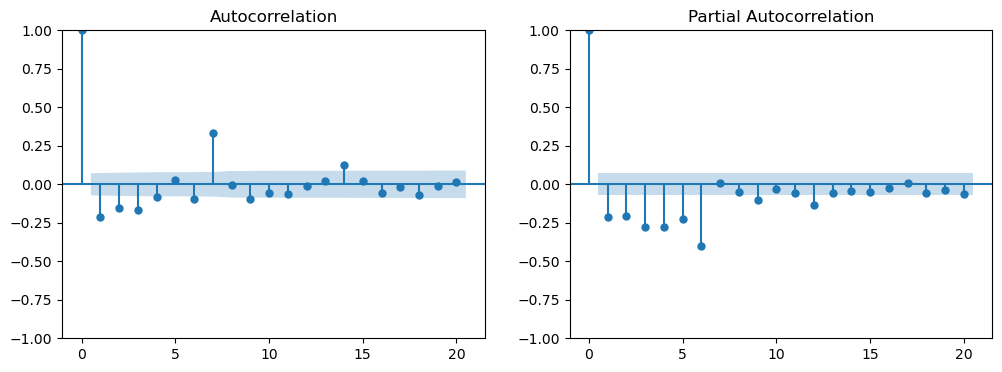


Time Series - grocery_and_pharmacy_percent_change_from_baseline
ARIMA MAE: 9.35, RMSE: 10.14




ADF Statistic: -3.260853797096699, p-value: 0.016721602304220127
The series is stationary.


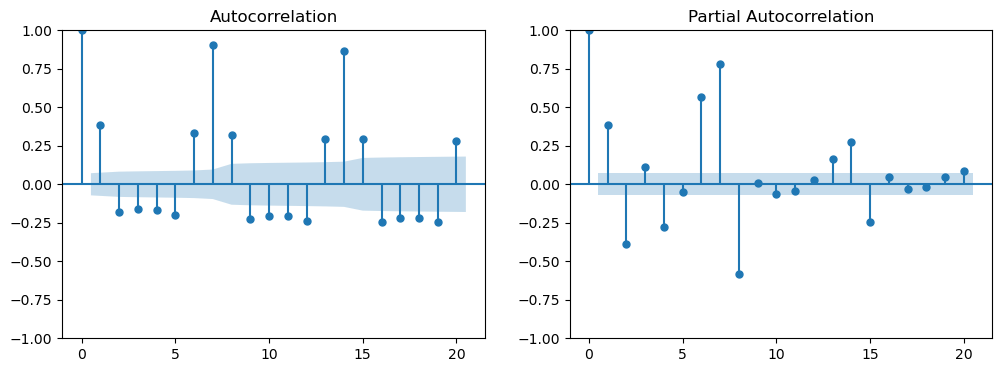


Time Series - workplaces_percent_change_from_baseline
ARIMA MAE: 8.81, RMSE: 10.80




ADF Statistic: -2.4518282416425845, p-value: 0.12763912938564714
The series is not stationary. Applying differencing...


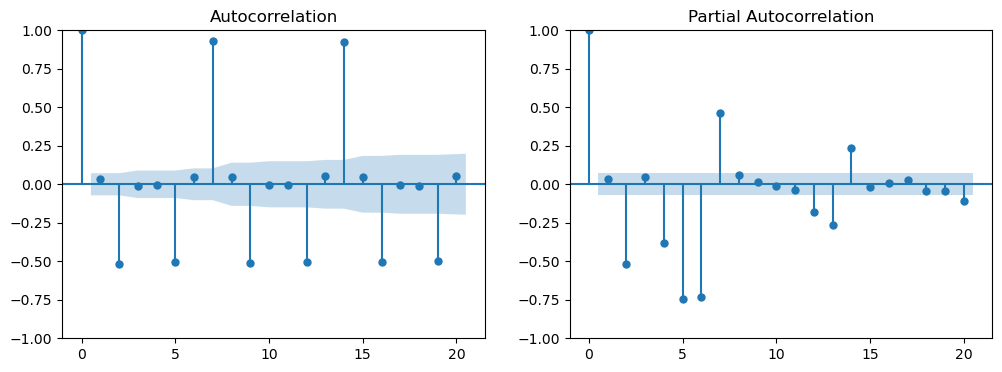


Time Series - residential_percent_change_from_baseline
ARIMA MAE: 1.89, RMSE: 2.54


In [220]:

# Best ARIMA orders
arima_orders = {
    'grocery_and_pharmacy_percent_change_from_baseline': (4, 3, 2),
    'workplaces_percent_change_from_baseline': (4, 0, 4),
    'residential_percent_change_from_baseline': (4, 1, 4)
}

for column in time_series_columns:
    # Select the time series column
    y = us_mobility_data_copy[column]

    # Train-test split
    train, test = y[:train_size], y[train_size:]

    # Check stationarity using Augmented Dickey-Fuller test
    result_adf = adfuller(train)
    print(f'\n\nADF Statistic: {result_adf[0]}, p-value: {result_adf[1]}')
    
    # Ensure stationarity through differencing
    if result_adf[1] > 0.05:
        print('The series is not stationary. Applying differencing...')
        train_diff = train.diff().dropna()
    else:
        print('The series is stationary.')
        train_diff = train

    # Plot ACF and PACF to determine ARIMA parameters
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(train_diff, lags=20, ax=ax1)
    plot_pacf(train_diff, lags=20, ax=ax2)
    plt.show()

    # Choose p, d, and q based on ACF and PACF plots
    # For simplicity, you can manually interpret these plots and set the orders
    # Alternatively, you can use an automated approach like grid search

    # Build ARIMA model
    p, d, q = arima_orders[column]
    model = ARIMA(train, order=(p, d, q))
    fit_arima = model.fit()

    # Forecast using ARIMA model
    forecast_arima = fit_arima.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

    # Evaluate the model
    mae_arima = mean_absolute_error(test, forecast_arima)
    rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))

    # Print evaluation metrics
    print(f"\nTime Series - {column}")
    print(f"ARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")

    # Plot the results using Plotly
    fig = go.Figure()

    # Training Data
    fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Training Data'))

    # Test Data
    fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Test Data'))

    # ARIMA Forecast
    fig.add_trace(go.Scatter(x=test.index, y=forecast_arima, mode='lines', name='ARIMA Forecast'))

    # Update layout
    fig.update_layout(title=f'Time Series Forecasting - {column}', xaxis_title='Date', yaxis_title='Value')
    fig.show()


### Task 2.6: Compare your best ES and best ARIMA models for each time series using forecast evaluation metrics. Show which model is best in each case

We can able to find out the best model between ES and ARIMA by comparing the MAE and RMSE values, and the ones having a lower value would be considered as the best model in each case.

### For grocery_and_pharmacy_percent_change_from_baseline timeseries


SES MAE: 5.37, RMSE: 6.03
Holt-Winters MAE: 5.50, RMSE: 6.20
ARIMA MAE: 9.35, RMSE: 10.14
|||
Conclusion: Comparing all the values, it can be found that SES and Holt-Winters are almost the same and is way better than ARIMA model for the grocery_and_pharmacy_percent_change_from_baseline timeseries





### For workplaces_percent_change_from_baseline timeseries


SES MAE: 16.44, RMSE: 17.70
Holt-Winters MAE: 17.10, RMSE: 18.74
ARIMA MAE: 8.81, RMSE: 10.80
|||
Conclusion: Comparing all the values, it can be found that ARIMA performs much better than SES and Holt-Winters and hence can be considered as the best model for the workplaces_percent_change_from_baseline timeseries



### For residential_percent_change_from_baseline Timeseries


SES MAE: 9.14, RMSE: 10.60
Holt-Winters MAE: 9.16, RMSE: 10.63
ARIMA MAE: 1.89, RMSE: 2.54
|||
Conclusion: When Comparing all the necessary values, it can be found that ARIMA performs much better than SES and Holt-Winters and hence can be considered as the best model for the residential_percent_change_from_baseline timeseries

### Task 2.7: Using your best model, forecast the rest of 2022 for each time series. Show these forecasts by plotting the past data points in 1 color and the future data points in a second color

In [227]:


# Assuming your dataframe is named df and has the necessary columns including 'date'
# Also, make sure the 'date' column is in datetime format
us_mobility_data_copy['date'] = pd.to_datetime(us_mobility_data_copy['date'])

# ARIMA orders and best model information from Task 2.5
arima_orders = {
    'workplaces_percent_change_from_baseline': (4, 0, 4),
    'residential_percent_change_from_baseline': (4, 1, 4)
}

best_models = {
    'grocery_and_pharmacy_percent_change_from_baseline': 'SES',  # or 'Holt-Winters'
    'workplaces_percent_change_from_baseline': 'ARIMA',
    'residential_percent_change_from_baseline': 'ARIMA'
}

# Loop through each time series column
for column, best_model in best_models.items():
    # Extract the time series data
    y = us_mobility_data_copy.set_index('date')[column]

    # Forecast the remaining data for 2022 based on the best model
    if best_model == 'ARIMA':
        best_order = arima_orders[column]
        model_arima = sm.tsa.ARIMA(y, order=best_order)
        model_arima_fit = model_arima.fit()
        forecast_index = pd.date_range(start=y.index.max() + pd.Timedelta(days=1), end='2022-12-31', freq='D')
        forecast = model_arima_fit.forecast(steps=len(forecast_index))
    else:
        # Assuming SES/Holt-Winters
        model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit()
        forecast_index = pd.date_range(start=y.index.max() + pd.Timedelta(days=1), end='2022-12-31', freq='D')
        forecast = fit.forecast(steps=len(forecast_index))

    # Plot past and future data points using Plotly
    fig = go.Figure()

    # Past Data
    fig.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Past Data', line=dict(color='blue')))

    # Forecast
    fig.add_trace(go.Scatter(x=forecast_index, y=forecast, mode='lines', name='Forecast', line=dict(color='green')))

    # Update layout
    fig.update_layout(title=f'{column} Forecast for the Rest of 2022', xaxis_title='Date', yaxis_title='Value')
    fig.show()
